In [206]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


In [207]:
df = pd.read_csv('Москва_2021.txt', sep = ' ', header=None)
df.columns = ['age']

In [208]:
df = df.sort_values(by='age')
df

,age
1980,14
15874,14
27638,14
20655,14
29875,14
...,...
14586,73
20178,73
11895,73
1228,73


# строим дискретный ряд

In [209]:
age = list(df.age.unique())
age.sort()

In [210]:
frequency = [int(df[df.age == i].count()) for i in age]

In [211]:
d_series = pd.DataFrame({'age': age,
                        'frequency': frequency})

In [212]:
d_series

,age,frequency
0,14,49
1,15,53
2,16,236
3,17,126
4,18,806
5,19,971
6,20,910
7,21,716
8,22,944
9,23,1071


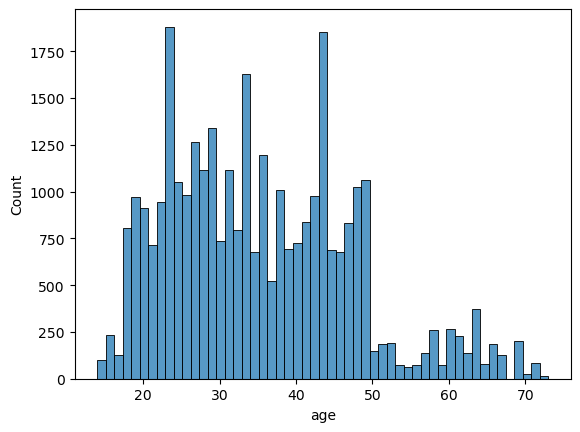

In [213]:
sns.histplot(data=df, x='age')
plt.show()

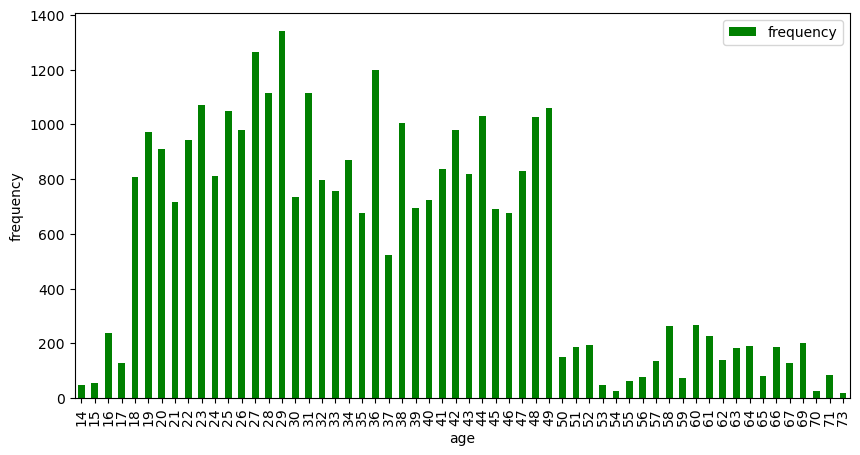

In [214]:
d_series.set_index('age').plot(kind='bar', figsize=(10, 5), color = 'green')
#Добавление подписей к осям
plt.xlabel("age")
plt.ylabel("frequency")
plt.xticks(rotation=90) # поворот надписей на оси X

plt.show()

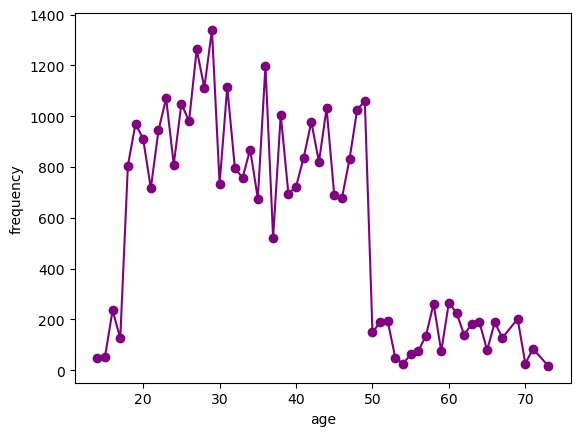

In [215]:
# график полигона
plt.plot(d_series.set_index('age'), marker='o', linestyle='-', color='purple')

#подписи к осям
plt.xlabel('age')
plt.ylabel('frequency')

#е график
plt.show()

In [216]:
#выборочная средняя
mean = np.mean(df)
mean

/Users/Vladislav/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


age    35.373007
dtype: float64

In [217]:
#дисперсия
D = np.var(df)
D

age    144.916968
dtype: float64

In [218]:
# среднее квадр. откл
std = np.std(df)
std

age    12.038146
dtype: float64

In [219]:
# коэф. вариации
cof_var = std / mean * 100
cof_var

age    34.032013
dtype: float64

In [220]:
# мода
mode = int(df.mode().age)
mode

29

In [221]:
# частота моды
mode_freq = int(d_series[d_series.age == mode].frequency) 
mode_freq

1340

In [222]:
# медиана
median = df.median()
median

age    34.0
dtype: float64

In [223]:
# минимальное
min = df.min()
min

age    14
dtype: int64

In [224]:
# максимальное
max = df.max()
max

age    73
dtype: int64

In [225]:
# размах
delta = max - min
delta

age    59
dtype: int64

строим интервальный ряд

In [226]:
import math

In [227]:
# определяем число групп по формуле Стёрджесса

m = 1 + 3.222 * math.log(delta, 10)
m

6.705685181510988

In [228]:
# длина интервала (округлим m до 7)

h = float(delta) / 7
h

8.428571428571429

In [229]:
points = [round(14 + h * i) for i in range(8)]
points1 = [round(14 + 9 * i) for i in range(8)]

In [230]:
points1

[14, 23, 32, 41, 50, 59, 68, 77]

In [231]:
points

[14, 22, 31, 39, 48, 56, 65, 73]

In [232]:
intervals1 = [str(points1[i]) + "-" + str(points1[i + 1])
            for i in range(len(points1) - 1)]

intervals = [str(points[i]) + "-" + str(points[i + 1])
            for i in range(len(points) - 1)]

In [233]:
intervals1

['14-23', '23-32', '32-41', '41-50', '50-59', '59-68', '68-77']

In [234]:
intervals

['14-22', '22-31', '31-39', '39-48', '48-56', '56-65', '65-73']

In [235]:
freq = []
freq1 = []

In [236]:
int(df[df.age >= 14][df.age < 22].count())

3867

In [237]:
for i in range(len(points1) - 1):
    if i != len(points1) - 2:
        freq1.append(int(df[df.age >= points1[i]]
                        [df.age < points1[i + 1]].count()))
    else:
        freq1.append(int(df[df.age >= points1[i]]
                        [df.age <= points1[i + 1]].count()))

for i in range(len(points) - 1):
    if i != len(points) - 2:
        freq.append(int(df[df.age >= points[i]]
                        [df.age < points[i + 1]].count()))
    else:
        freq.append(int(df[df.age >= points[i]]
                        [df.age <= points[i + 1]].count()))

/var/folders/fs/fjkj927112n4rqd21dqgklrm0000gp/T/ipykernel_36324/396088751.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  freq1.append(int(df[df.age >= points1[i]]
/var/folders/fs/fjkj927112n4rqd21dqgklrm0000gp/T/ipykernel_36324/396088751.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  freq1.append(int(df[df.age >= points1[i]]
/var/folders/fs/fjkj927112n4rqd21dqgklrm0000gp/T/ipykernel_36324/396088751.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  freq.append(int(df[df.age >= points[i]]
/var/folders/fs/fjkj927112n4rqd21dqgklrm0000gp/T/ipykernel_36324/396088751.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  freq.append(int(df[df.age >= points[i]]


In [238]:
freq1

[4811, 9476, 7243, 7951, 1140, 1472, 330]

In [239]:
freq

[3867, 9305, 6940, 7283, 2752, 1551, 725]

In [240]:
summ = 0
for n in freq1:
    summ += n
summ

32423

In [241]:
i_series1 = pd.DataFrame({'interval': intervals1,
                        'frequency': freq1})
i_series = pd.DataFrame({'interval': intervals,
                        'frequency': freq})
i_series1

,interval,frequency
0,14-23,4811
1,23-32,9476
2,32-41,7243
3,41-50,7951
4,50-59,1140
5,59-68,1472
6,68-77,330


In [242]:
i_series

,interval,frequency
0,14-22,3867
1,22-31,9305
2,31-39,6940
3,39-48,7283
4,48-56,2752
5,56-65,1551
6,65-73,725


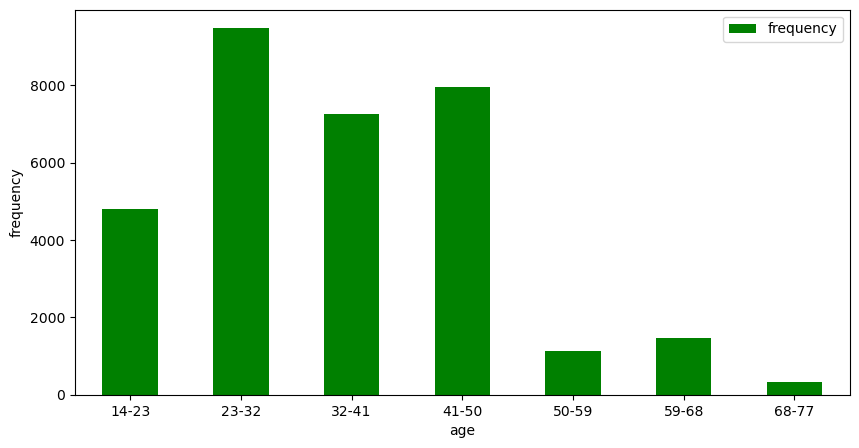

In [243]:
i_series1.set_index('interval').plot(kind='bar', figsize=(10, 5), color = 'green')
#Добавление подписей к осям
plt.xlabel("age")
plt.ylabel("frequency")
plt.xticks(rotation=0) # поворот надписей на оси X

plt.show()

In [244]:
points[1] + points[0]

36

In [262]:
# выборочная средняя
m1 = [(points[i] + points[i+1]) / 2 * freq[i] 
             for i in range(len(freq))] / i_series.frequency.sum()
mean1=0
for i in m1:
    mean1 += i
mean1

35.865388767233135

In [263]:
# дисперсия
d1 = [((points[i] + points[i + 1]) / 2 - mean1) ** 2 * freq[i] 
    for i in range(len(freq))] / i_series.frequency.sum()
D1 = 0
for i in d1:
    D1 += i
D1

152.1676044559291

In [247]:
# среднее квадр. откл
std1 = math.sqrt(D1)
std1

12.335623391459757

In [248]:
# коэф. вариации
cof_var1 = std1 / mean1 * 100
cof_var1

34.39422745845061

In [249]:
# мода
inter = i_series[i_series.frequency == i_series.frequency.max()].interval
inter

1    22-31
Name: interval, dtype: object

In [250]:
mode1 = 22 + 9 * (freq[1] - freq[0]) / (freq[1] - freq[0] + freq[1] - freq[2])
mode1

28.2722029988466

In [251]:
# частота моды
freq1 = int(df[df.age == 28].count())
freq1

1113

In [252]:
# медиана
sum = 0
i = 0
while sum < int(df.count()) / 2:
    sum += freq[i]
    i += 1
print(intervals[i - 1], freq[i - 1], sum)

31-39 6940 20112


In [253]:
median1 = 31 + 8 * (int(df.count()) / 2 - (sum - freq[i - 1])) / freq[i - 1]
median1

34.50374639769453

In [254]:
# минимальное
min1 = points[0]
min1

14

In [255]:
# максимальное
max1 = points[-1]
max1

73

In [256]:
# размах
delta1 = max1 - min1
delta1

59